# Primeros Pasos Con PySpark




## *Instructor: José David Arévalo*

- email: <jdaarevalo@gmail.com>
- twitter: [@jdaarevalo](https://twitter.com/jdaarevalo)
- linkedin: [jdavidarevalo](https://www.linkedin.com/in/jdavidarevalo/)
- github: [jdaarevalo](https://github.com/jdaarevalo)



###### Marzo 07, 2019


## Agenda

0. Instalación
1. Extract Information
2. Spark Transformations and Actions
3. Recomendaciones y referencias

## 0. Instalalción

Antes de comenzar es necesario tener instalado Python 3 (Anaconda) y Java 8 o superior.

Descargar el archivo .tgz del sitio https://spark.apache.org/downloads.html
Para este repositorio trabajaremos con spark-2.3.1-bin-hadoop2.6

Ahora en la terminal procedemos a descomprimir el archivo.

```sh
$ tar -xvf spark-2.1.1-bin-hadoop2.7.tgz
```

Ubicaremos el archivo en /usr/local y crearemos un enlace simbolico a esta carpeta.
Es aconsejable tener la carpeta original y el enlace, ya que a futuro se podría trabajar con diferentes versiones de spark

```sh
$ sudo mv spark-2.1.1-bin-hadoop2.7 /usr/local/
$ sudo ln -s /usr/local/spark-2.1.1-bin-hadoop2.7/ /usr/local/spark
$ cd /usr/local/spark
```
Agregamos la variable SPARK_HOME a las variables de entorno, de preferencia en el /.bashrc

```sh
$ export SPARK_HOME=/usr/local/spark
```

Run sprak-shell
In scala
```sh
$ $SPARK_HOME/bin/spark-shell
```
or in python 
```sh
$SPARK_HOME/bin/pyspark
```



Iniciamos el servicio master en modo standalone. En el puerto http://127.0.0.1:8080/ es posible identificar que spark n.
```sh
$ $SPARK_HOME/sbin/start-master.sh
```

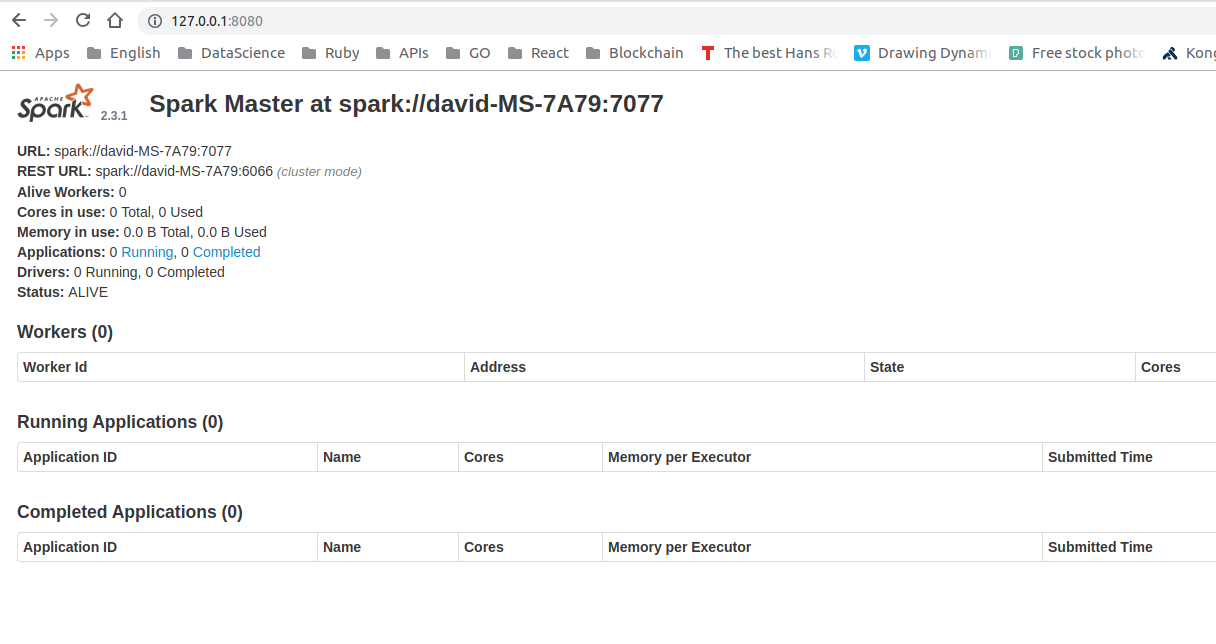

In [1]:
from IPython.display import Image
Image("images/spark_run.png")

Ahora agregamos las siguientes líneas a nuestro /.bashrc para poder ejecutar PySpark en Jupyter

```sh
export SPARK_HOME=/opt/spark
export PATH=$SPARK_HOME/bin:$PATH
export PYSPARK_DRIVER_PYTHON=jupyter
export PYSPARK_DRIVER_PYTHON_OPTS='notebook'
```

De no tener instalado Jupyter, será suficiente con hacer
```sh
$ pip install jupyter
```

Recomendación: Instalar Anaconda

## 1. Extract Information

Una vez instalado Spark, ejecutamos 

```sh
$ pyspark
```

In [2]:
import findspark
findspark.init()

In [3]:
# Importamos los modulos necesarios
import pyspark  #python package

# objeto principal o la base a partir de la cual cuelga toda la funcionalidad de Apache Spark
from pyspark.sql import SparkSession

# Se trata del context básico de Spark, desde donde se crean el resto de variables 
# que maneja el framework. Sólo un SparkContext puede estar activo por JVM.
from pyspark import SparkContext

# el objeto functions del modulo sql define las funciones estándar incorporadas 
# para trabajar con (valores producidos) columnas.
import pyspark.sql.functions as func

In [4]:
# create a new spark session, que sera la base para nuestra aplicacion

spark = SparkSession.builder\
                    .appName("Test")\
                    .config("spark.jars.packages", "org.postgresql:postgresql:9.4.1211")\
                    .getOrCreate()

#spark sera el punto de entrada para la aplicacion
# el package se pude descargar de https://jdbc.postgresql.org/download.html

In [5]:
# el Spark Session incluye todas las API disponibles en diferentes contextos: 
# Spark Context, SQL Context, Streaming Context, Hive Context.
sc = spark.sparkContext

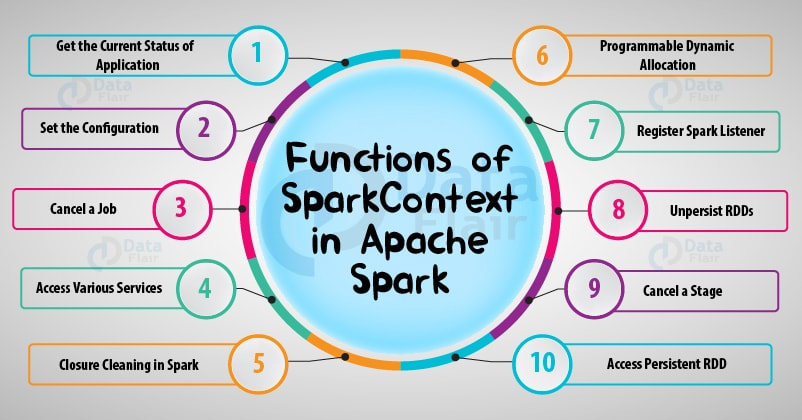

In [6]:
Image("https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2017/08/functions-of-sparkcontext-in-apache-spark.jpg")

In [7]:
# variables de conexion a la base de datos
jdbcPort = 5432                                                                           
jdbcHostname = "ec2-50-19-109-120.compute-1.amazonaws.com"
jdbcDatabase = "d3p4ja95tq65b6"         
jdbcUsername='rxyunyrozqzfts'                                                              
jdbcPassword='8906da7d7d9a87bc1c65f515a1c559b76e5985cdba6f7d29c6dbdb2fa97fb685'

jdbcHostname = "production-green.omnibnk.io"
jdbcDatabase = "production_service_documents_db"                                       
jdbcUsername='platform_risk'                                                              
jdbcPassword='KG9EsjXsZ6nsNyQq'
# jdbc url para conectarse a la base de datos
jdbcUrl = "jdbc:postgresql://{0}:{1}/{2}".format(jdbcHostname, jdbcPort, jdbcDatabase)

# propiedades para la conexion a la base de datos
connectionProperties = {                                                                  
  "user" : jdbcUsername,
  "password" : jdbcPassword,
  "driver": 'org.postgresql.Driver',                                                      
  "stringtype": "unspecified"                                                             
}

In [8]:
df_invoices = spark.read.jdbc(url=jdbcUrl,
                              table="invoices",
                              properties=connectionProperties)

In [9]:
df_invoices.printSchema()

root
 |-- id: string (nullable = true)
 |-- issuer_tax_number: string (nullable = true)
 |-- debtor_tax_number: string (nullable = true)
 |-- doc_number: string (nullable = true)
 |-- issue_date: timestamp (nullable = true)
 |-- due_date: timestamp (nullable = true)
 |-- amount_total: double (nullable = true)
 |-- currency_code: string (nullable = true)
 |-- dte: string (nullable = true)
 |-- dte_type: string (nullable = true)
 |-- created_at: timestamp (nullable = true)
 |-- updated_at: timestamp (nullable = true)
 |-- amount_net: double (nullable = true)
 |-- amount_exempt: double (nullable = true)
 |-- amount_tax: double (nullable = true)
 |-- operation_type: string (nullable = true)
 |-- reception_date: timestamp (nullable = true)
 |-- receipt_date: timestamp (nullable = true)
 |-- amount_other_taxes: double (nullable = true)
 |-- amount_tax_non_recoverable: double (nullable = true)
 |-- code_tax_non_recoverable: string (nullable = true)
 |-- amount_net_fixed_assets: double (nullab

In [24]:
df_invoices = spark.read.jdbc(url=jdbcUrl,
                              table="(\
                                  select issuer_tax_number, debtor_tax_number, id, amount_total, reception_date \
                                  from invoices \
                                  limit 10000) as data_table",
                              properties=connectionProperties)

In [11]:
df_invoices.printSchema()

root
 |-- issuer_tax_number: string (nullable = true)
 |-- debtor_tax_number: string (nullable = true)
 |-- id: string (nullable = true)
 |-- amount_total: double (nullable = true)
 |-- reception_date: timestamp (nullable = true)



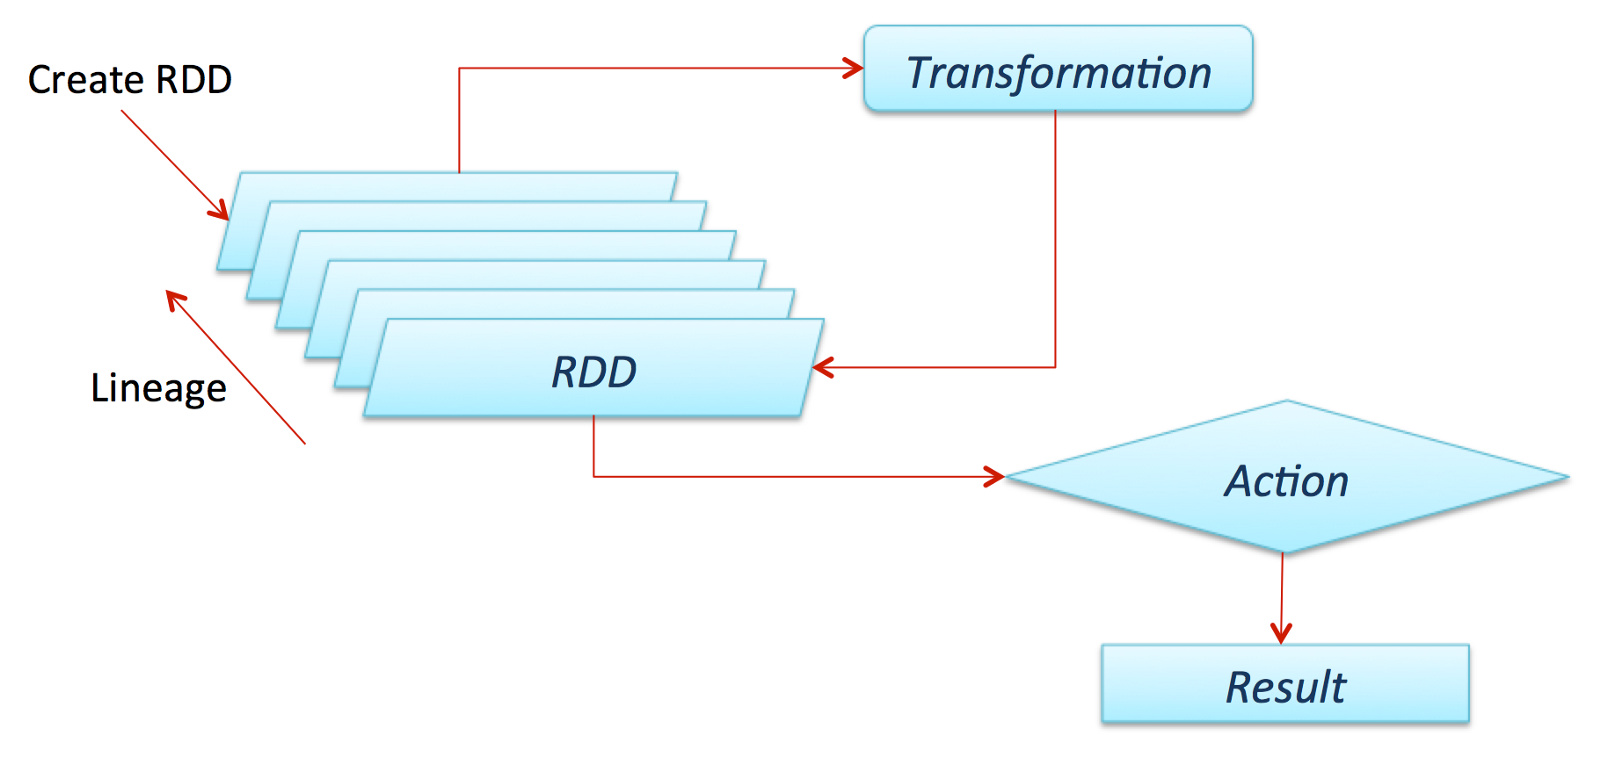

In [12]:
Image("images/transformations.png")

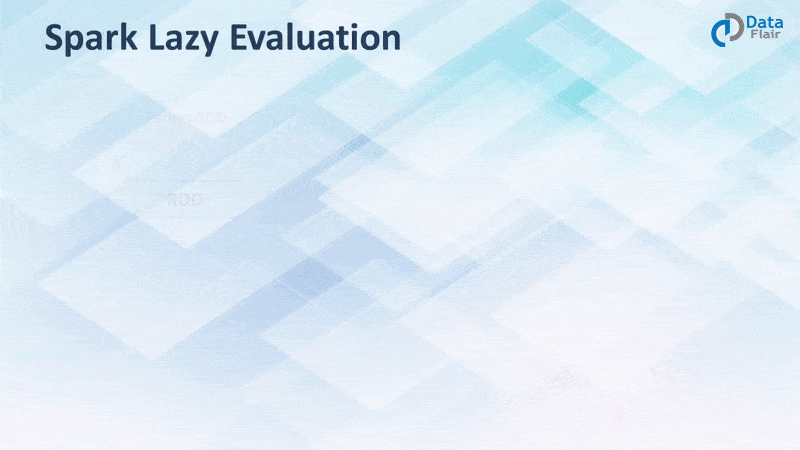

In [13]:
Image("https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2017/06/apache-spark-lazy-evaluation.gif")

# 2. Spark Transformations

Una transformación se evalúa de forma perezosa y el trabajo real ocurre cuando se produce una acción .

Transformaciones, que crean nuevos conjuntos de datos, como puede ser la operación map() que pasa cada elemento por una determinada función y devuelve un nuevo RDD con el resultado. Acciones, que devuelven un valor al driver del clúster después de llevar a cabo una computación sobre el conjunto de datos. Un ejemplo de este tipo es la función reduce(), que agrega todos los elementos de un RDD mediante una función y devuelve el resultado.


In [14]:
df_invoices.withColumn("usd_amount", df_invoices.amount_total/2950)

DataFrame[issuer_tax_number: string, debtor_tax_number: string, id: string, amount_total: double, reception_date: timestamp, usd_amount: double]

In [22]:
df_invoices = df_invoices.withColumn("usd_amount", df_invoices.amount_total/2950)

df_invoices_new = df_invoices.select("id", "amount_total","usd_amount").filter("usd_amount > 100")

In [23]:
df_invoices_new.show()

+--------------------+------------+------------------+
|                  id|amount_total|        usd_amount|
+--------------------+------------+------------------+
|94e14dbb-19f7-49f...|    421103.0|142.74677966101694|
|12c3a3b3-78b6-4f6...|    571649.0| 193.7793220338983|
|2528a228-3809-4b7...|   1233334.0| 418.0793220338983|
|ca6c91eb-15d7-4ff...|    329035.0|111.53728813559322|
|93b44804-80ad-473...|    565771.0|191.78677966101694|
|994568b3-ea68-495...|   1215844.0|412.15050847457627|
|a17f5633-b5aa-463...|   2045848.0| 693.5077966101695|
|a74d8674-0a76-48d...|    583098.0|197.66033898305085|
|720d82e1-4d85-496...|    560689.0|190.06406779661017|
|f279fab6-1e7c-4e5...|    499449.0|169.30474576271186|
|8c799f98-8af2-45d...|    343922.0|116.58372881355932|
|65074fd4-5e36-44a...|    710394.0|240.81152542372882|
|a171b778-4380-420...|   1331615.0| 451.3949152542373|
|7f194cb7-cf9a-4e0...|   4225845.0|1432.4898305084746|
|dfec521d-fbca-493...|   2613633.0| 885.9772881355932|
|0f18acb5-

## Spark Transformations
map()

flatMap()

filter()

sample()

union()

intersection()

distinct()

join()

## Spark Actions
reduce()             

collect()               

count()

first()    

takeSample(withReplacement, num)   

In [17]:
invoices_collect = df_invoices.collect()
invoices_collect

[Row(id='119e4829-3cda-486b-8d8e-f422aae0e0bd', amount_total=2590154.0, usd_amount=878.0183050847457),
 Row(id='a98b7465-9d64-47d2-b4e5-b7ad16a0d599', amount_total=528524.0, usd_amount=179.1606779661017),
 Row(id='c4911061-9afe-498c-b5ea-e71ffd95f565', amount_total=720343.0, usd_amount=244.18406779661018),
 Row(id='50fa77ff-6a92-45c8-88f1-67f6a06eebbf', amount_total=1299409.0, usd_amount=440.4776271186441),
 Row(id='c5911a18-17e5-4a88-8185-0bb5dcc00c47', amount_total=2105158.0, usd_amount=713.6128813559322),
 Row(id='d84cb4d7-d023-425a-b55b-4e0f30c34804', amount_total=559354.0, usd_amount=189.6115254237288),
 Row(id='8fcccd4d-e0bd-42fe-a365-cf93c0ba6168', amount_total=301864.0, usd_amount=102.32677966101694),
 Row(id='29ee0ae4-c344-4b74-8cef-f219dcbb52f8', amount_total=330820.0, usd_amount=112.14237288135594),
 Row(id='6657141c-7ef6-45a3-ade0-b61bbb635f65', amount_total=524112.0, usd_amount=177.6650847457627),
 Row(id='37bcb64f-4441-4860-b05f-9b567510e893', amount_total=399967.0, usd_a

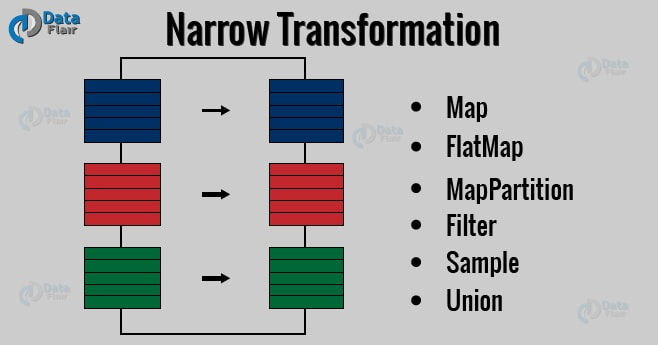

In [18]:
Image("https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2017/08/spark-narrow-transformation-2.jpg")

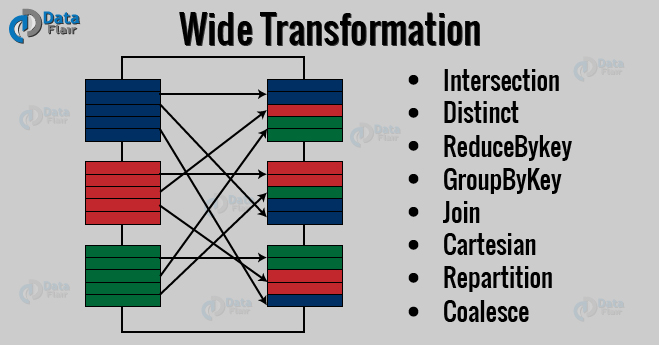

In [19]:
Image("https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2017/08/spark-wide-transformation-1.jpg")

In [25]:
# es posible crear (o reemplaza si ese nombre de vista ya existe) una "vista"
# evaluada perezosamente que luego puede usar como una tabla de Hive en Spark SQL.
# No se conserva en la memoria a menos que almacene en caché el conjunto de datos
# que sustenta la vista.
df_invoices.createOrReplaceTempView('invoice_table')

In [26]:
spark.sql('select issuer_tax_number, debtor_tax_number, max(amount_total) from invoice_table \
          group by issuer_tax_number, debtor_tax_number').show()

+-----------------+-----------------+-----------------+
|issuer_tax_number|debtor_tax_number|max(amount_total)|
+-----------------+-----------------+-----------------+
|        76150343K|        763499847|         258230.0|
|        76150343K|        767511124|         133475.0|
|        76150343K|        786322006|          80375.0|
|        76150343K|        714579002|         361491.0|
|        76150343K|        136327267|          21206.0|
|        76150343K|        764270312|          54096.0|
|        76150343K|        81494400K|         440559.0|
|        76150343K|        969850206|          21206.0|
|        76150343K|        609110007|          53806.0|
|        76150343K|        786330904|          24562.0|
|        76150343K|        784587401|         154631.0|
|        76150343K|        795781404|          72807.0|
|        76150343K|        761914707|         697824.0|
|        76150343K|        760875473|           7973.0|
|        76150343K|        995491303|         16

# Referencias

## Guía de Intalación
https://blog.sicara.com/get-started-pyspark-jupyter-guide-tutorial-ae2fe84f594f

## Tutorial de Spark
https://data-flair.training/blogs/spark-tutorial/